**1: Load and Inspect the Dataset**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/kaggle/input/porter-delivery/dataset.csv")
print("First 5 Rows:")
print(df.head())
print("\n Column Info:")
print(df.dtypes)
print("\n Missing Values:")
print(df.isnull().sum())
print("\n Dataset Shape:")
print(df.shape)

First 5 Rows:
   market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26   

                           store_id store_primary_category  order_protocol  \
0  df263d996281d984952c07998dc54358               american             1.0   
1  f0ade77b43923b38237db569b016ba25                mexican             2.0   
2  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
3  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
4  f0ade77b43923b38237db569b016ba25                    NaN             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1       

**2: Convert Dates & Calculate Delivery Time**

In [4]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'], errors='coerce')
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60
print("Sample Delivery Time Calculation:")
print(df[['created_at', 'actual_delivery_time', 'delivery_time_minutes']].head())
print("\n Null or Invalid Delivery Times:")
print(df['delivery_time_minutes'].isnull().sum())

Sample Delivery Time Calculation:
           created_at actual_delivery_time  delivery_time_minutes
0 2015-02-06 22:24:17  2015-02-06 23:27:16              62.983333
1 2015-02-10 21:49:25  2015-02-10 22:56:29              67.066667
2 2015-01-22 20:39:28  2015-01-22 21:09:09              29.683333
3 2015-02-03 21:21:45  2015-02-03 22:13:00              51.250000
4 2015-02-15 02:40:36  2015-02-15 03:20:26              39.833333

 Null or Invalid Delivery Times:
7


**3: Delivery Time Summary & Outlier Detection**

In [27]:
print("Delievry Time Statistics:")
print(df['delivery_time_minutes'].describe())
outliers = df[df['delivery_time_minutes'] > 500]
valid = df[df['delivery_time_minutes'] <= 500]
print("\n Number of Outliers (Delivery Time > 500 mins):", len(outliers))
print("Number of Valid Records (<= 500 min):", len(valid))

Delievry Time Statistics:
count    197421.000000
mean         48.470956
std         320.493482
min           1.683333
25%          35.066667
50%          44.333333
75%          56.350000
max      141947.650000
Name: delivery_time_minutes, dtype: float64

 Number of Outliers (Delivery Time > 500 mins): 14
Number of Valid Records (<= 500 min): 197407


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


**4: Visual EDA**

**4.1: Distribution of Delivery Times**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


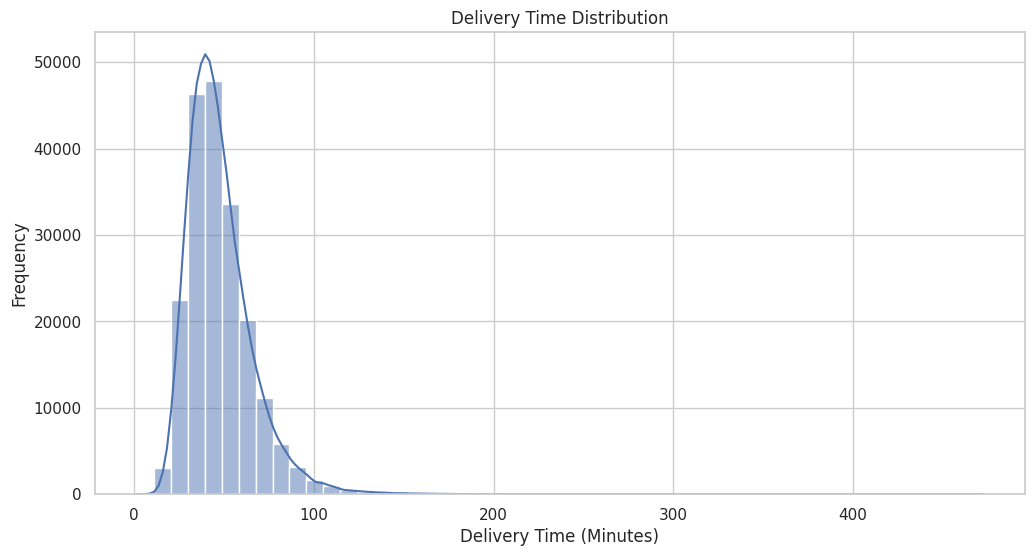

In [28]:
df_clean = df[df['delivery_time_minutes'] <= 500]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['delivery_time_minutes'], bins=50, kde=True)
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Frequency")
plt.show()

**4.2: Boxplot by Market ID**

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less_equal
  return op(a, b)


<Figure size 1200x600 with 0 Axes>

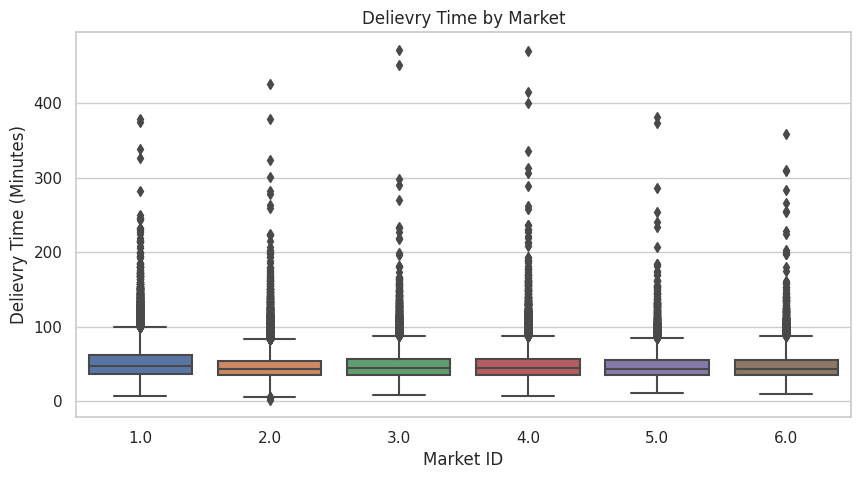

In [29]:
df_clean = df[df['delivery_time_minutes'] <= 500]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.figure(figsize=(10, 5))
sns.boxplot(x='market_id', y='delivery_time_minutes', data=df_clean)
plt.title("Delievry Time by Market")
plt.xlabel("Market ID")
plt.ylabel("Delievry Time (Minutes)")
plt.show()

**4.3: Boxplot by Store Category (Top 10)**

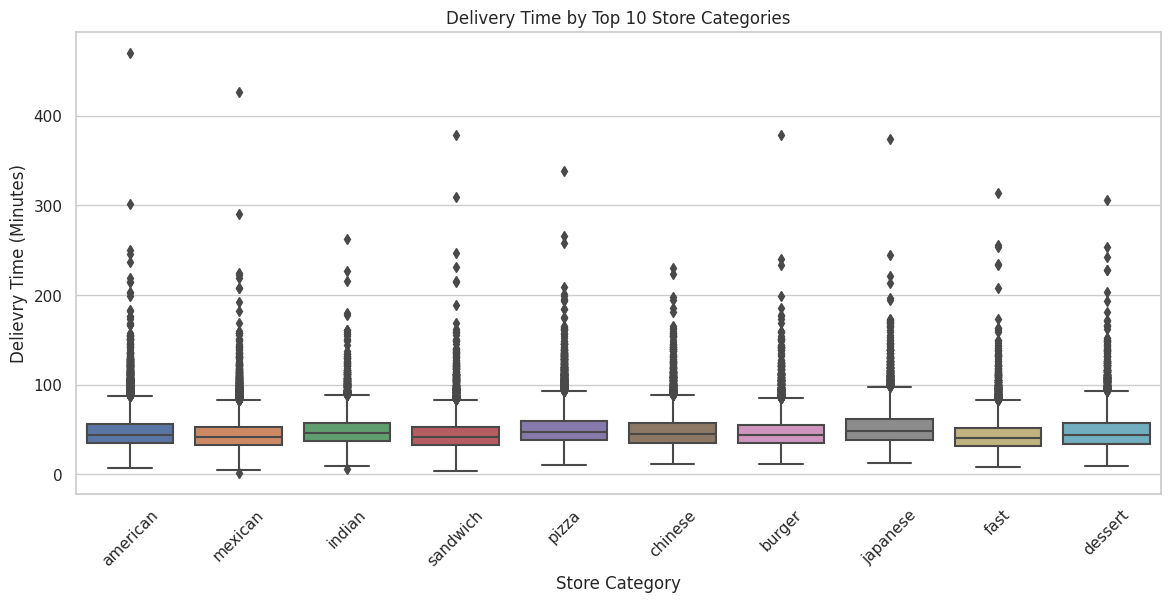

In [30]:
top_categories = df_clean['store_primary_category'].value_counts().head(10).index
df_top_cat = df_clean[df_clean['store_primary_category'].isin(top_categories)]
plt.figure(figsize=(14, 6))
sns.boxplot(x='store_primary_category', y='delivery_time_minutes', data=df_top_cat)
plt.title("Delivery Time by Top 10 Store Categories")
plt.xlabel("Store Category")
plt.ylabel("Delievry Time (Minutes)")
plt.xticks(rotation=45)
plt.show()

**4.4: Correlation Heatmap for Operational Features**

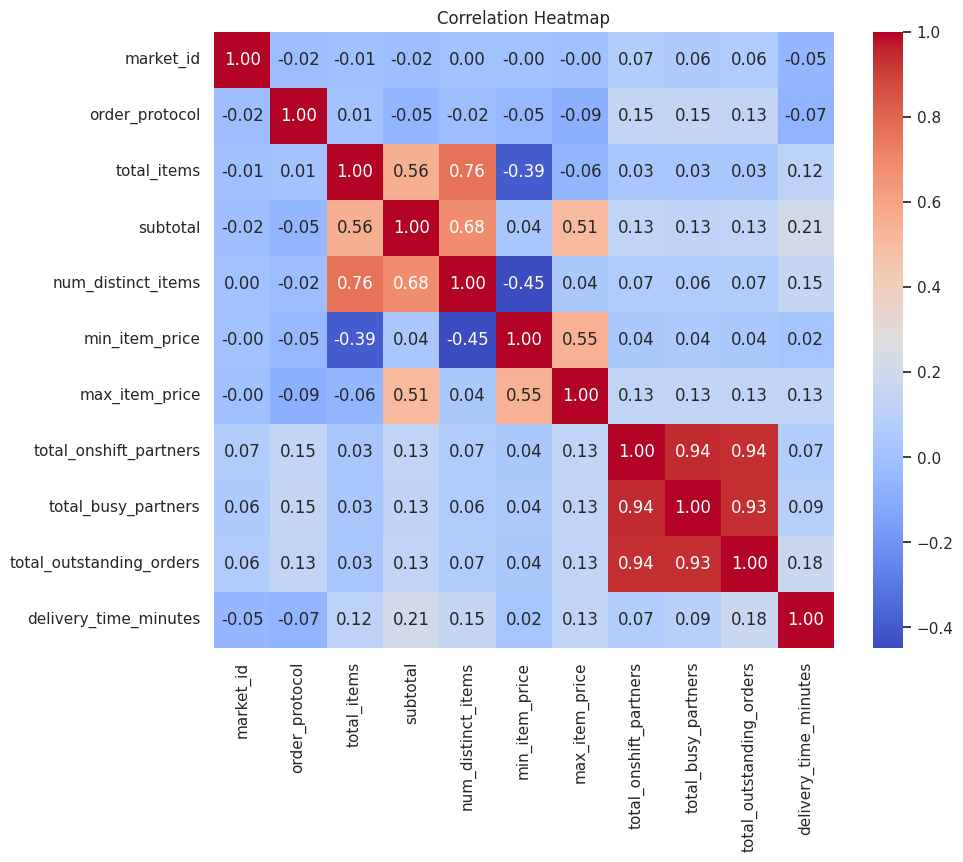

In [31]:
plt.figure(figsize=(10, 8))
num_cols = df_clean.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(num_cols, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**4.5: Delivery Time vs Total Items**

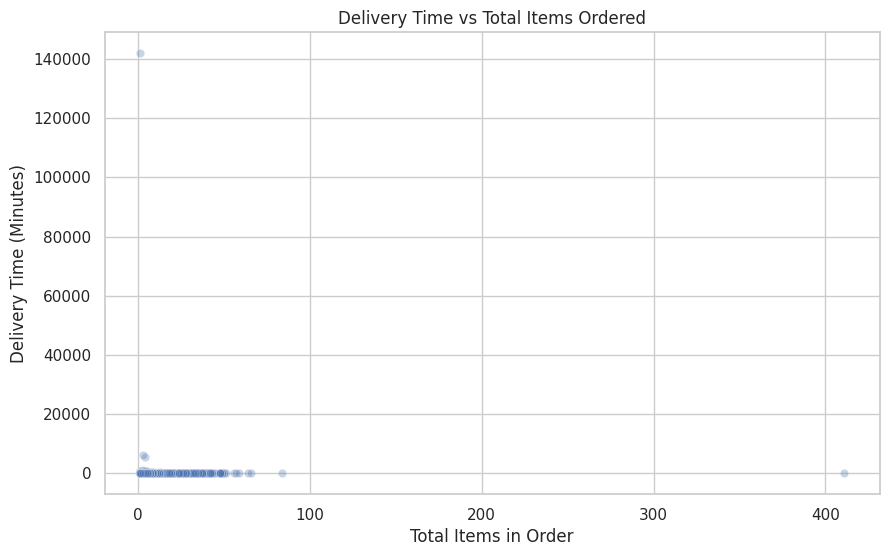


 Correlation between total_items and delievry_time_minutes: 0.00


In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_items', y='delivery_time_minutes', alpha=0.3)
plt.title("Delivery Time vs Total Items Ordered")
plt.xlabel("Total Items in Order")
plt.ylabel("Delivery Time (Minutes)")
plt.grid(True)
plt.show()
correlation = df[['total_items', 'delivery_time_minutes']].corr().iloc[0, 1]
print(f"\n Correlation between total_items and delievry_time_minutes: {correlation:.2f}")

**4.6: Delivery Time vs Subtotals**

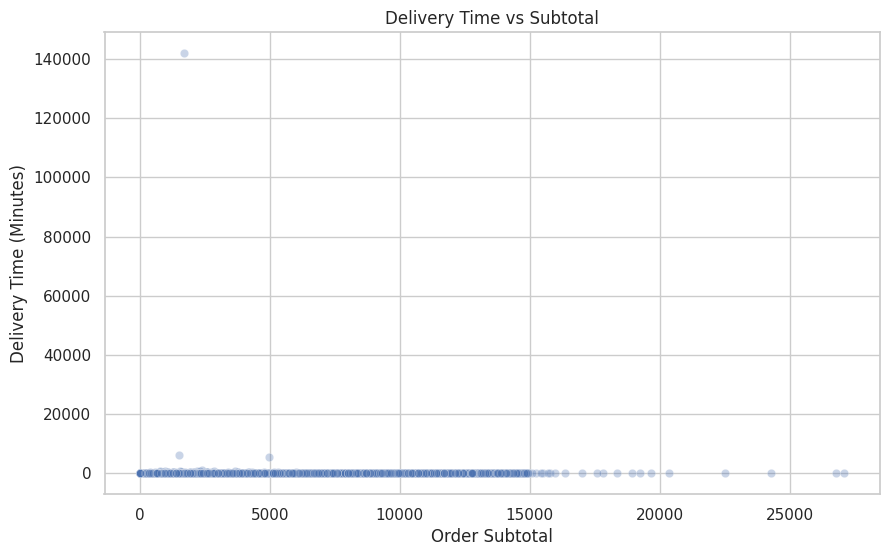


 Correlation between subtotal and delievry_time_minutes: 0.01


In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='subtotal', y='delivery_time_minutes', alpha=0.3)
plt.title("Delivery Time vs Subtotal")
plt.xlabel("Order Subtotal")
plt.ylabel("Delivery Time (Minutes)")
plt.grid(True)
plt.show()
correlation = df[['subtotal', 'delivery_time_minutes']].corr().iloc[0, 1]
print(f"\n Correlation between subtotal and delievry_time_minutes: {correlation:.2f}")

**4.7: Delivery Time vs Onshift Partners**

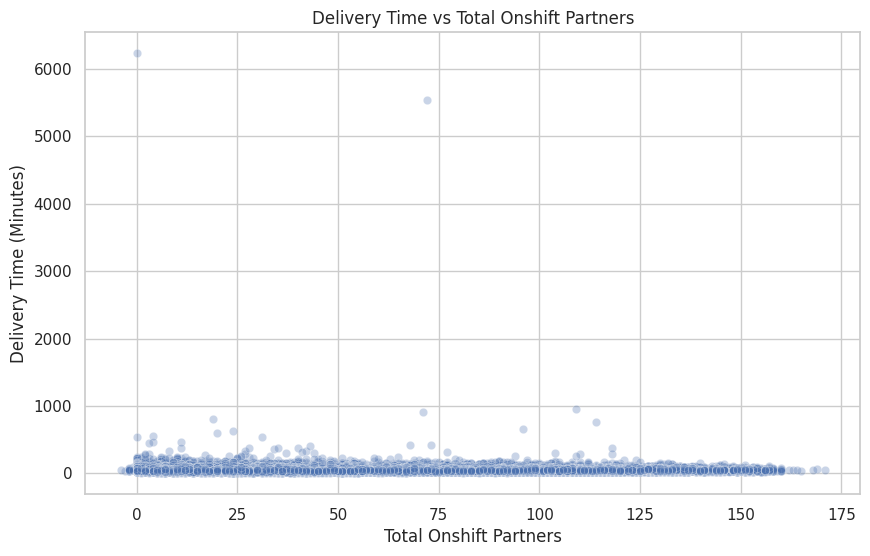


 Correlation between total_onshift_partners and delievry_time_minutes: 0.05


In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_onshift_partners', y='delivery_time_minutes', alpha=0.3)
plt.title("Delivery Time vs Total Onshift Partners")
plt.xlabel("Total Onshift Partners")
plt.ylabel("Delivery Time (Minutes)")
plt.grid(True)
plt.show()
correlation = df[['total_onshift_partners', 'delivery_time_minutes']].corr().iloc[0, 1]
print(f"\n Correlation between total_onshift_partners and delievry_time_minutes: {correlation:.2f}")

**4.8: Delivery Time vs Outstanding Orders**

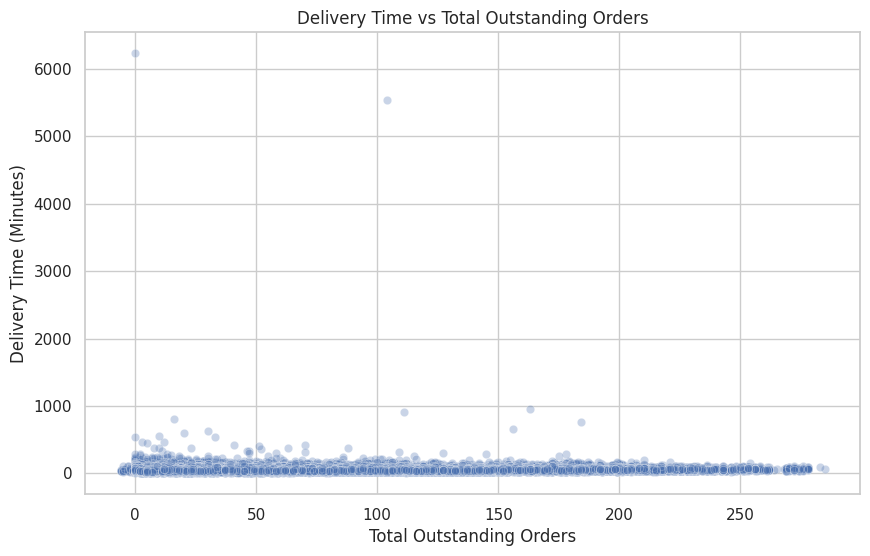


 Correlation between total_outstanding_orders and delievry_time_minutes: 0.12


In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_outstanding_orders', y='delivery_time_minutes', alpha=0.3)
plt.title("Delivery Time vs Total Outstanding Orders")
plt.xlabel("Total Outstanding Orders")
plt.ylabel("Delivery Time (Minutes)")
plt.grid(True)
plt.show()
correlation = df[['total_outstanding_orders', 'delivery_time_minutes']].corr().iloc[0, 1]
print(f"\n Correlation between total_outstanding_orders and delievry_time_minutes: {correlation:.2f}")